<a href="https://colab.research.google.com/github/scardenol/ai_2023/blob/main/2.%20Hybrid%20supervised/CNN/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import urllib.request  # the lib that handles the url stuff

In [ ]:
# Read data from github repo by url
# Load zip file containing folder from link
file_url = "https://github.com/scardenol/ai_2023/blob/main/2.%20Hybrid%20supervised/CNN/ourMNIST.zip?raw=true"
file_name = "ourMNIST.zip"
file = urllib.request.urlretrieve(file_url, file_name)

# Unzip folder
!unzip ourMNIST.zip

# Delete zip file
!rm ourMNIST.zip

Archive:  ourMNIST.zip
replace ourMNIST/cossio.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/cossio.csv     
replace ourMNIST/cossio.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/cossio.png     
replace ourMNIST/FBanoy.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/FBanoy.png     
replace ourMNIST/jpossaz.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/jpossaz.png    
replace ourMNIST/jpossaz2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/jpossaz2.png   
replace ourMNIST/JuanRengifo.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/JuanRengifo.png  
replace ourMNIST/load.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/load.py        
replace ourMNIST/thoyosg.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ourMNIST/thoyosg.png    




```
# Esto tiene formato de código
```



In [ ]:
# locates the files
%cd /content/ourMNIST 

/content/ourMNIST


In [ ]:
#load the image divition and layer asignation algorithm
import load
images, labels = load.load_all()

In [ ]:
#creates assignations for test and training
rp=np.random.permutation(len(labels))

subset_size = int(0.8 * len(rp))
subset_indices = rp[:subset_size]
train_image = [images[i] for i in subset_indices]
train_labels = [labels[i] for i in subset_indices]
train_labels = np.array(train_labels)
train_labels= train_labels.astype(np.uint8)
test_image = [images[i] for i in rp if i not in subset_indices]
test_labels = [labels[i] for i in rp if i not in subset_indices]
test_labels = np.array(test_labels)
test_labels= test_labels.astype(np.uint8)

In [ ]:
train_image = tf.expand_dims(train_image, 3)
test_image= tf.expand_dims(test_image, 3)
val_x = train_image[:5000]
val_y = train_labels[:5000]

In [ ]:
#LeNet 5 by Keras in tensor flow package
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_image[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
#creates a LeNet 5 model with some especifications
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# runs the model and assings the validation from some test data equal of 10% of the training data
history =  lenet_5_model.fit(train_image, train_labels, epochs=10, validation_split = 0.1)

Epoch 1/10
14/14 [==============================] - 3s 52ms/step - loss: 2.2998 - accuracy: 0.1048 - val_loss: 2.2897 - val_accuracy: 0.2041
Epoch 2/10
14/14 [==============================] - 0s 30ms/step - loss: 2.1625 - accuracy: 0.2984 - val_loss: 2.2264 - val_accuracy: 0.2245
Epoch 3/10
14/14 [==============================] - 0s 32ms/step - loss: 1.9227 - accuracy: 0.3941 - val_loss: 1.9424 - val_accuracy: 0.3469
Epoch 4/10
14/14 [==============================] - 1s 43ms/step - loss: 1.6244 - accuracy: 0.4806 - val_loss: 1.8495 - val_accuracy: 0.3673
Epoch 5/10
14/14 [==============================] - 1s 52ms/step - loss: 1.4268 - accuracy: 0.5513 - val_loss: 1.7642 - val_accuracy: 0.3878
Epoch 6/10
14/14 [==============================] - 1s 53ms/step - loss: 1.2959 - accuracy: 0.5695 - val_loss: 1.7734 - val_accuracy: 0.3673
Epoch 7/10
14/14 [==============================] - 1s 51ms/step - loss: 1.2170 - accuracy: 0.6150 - val_loss: 1.7595 - val_accuracy: 0.3878
Epoch 8/10
14

Train: 0.670, Test: 0.459


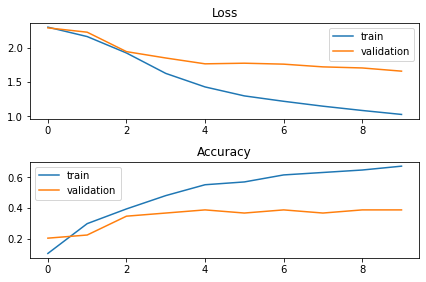

<Figure size 432x288 with 0 Axes>

In [ ]:
#plots the metrics
_, train_acc = lenet_5_model.evaluate(train_image, train_labels, verbose=0)
_, test_acc = lenet_5_model.evaluate(test_image, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.tight_layout(pad=1.0)
plt.show()
plt.savefig('/content/loss.png')